# Investigate the Data!
This looks at plotting up full volume scans in radial and gridded coordinates.

## Imports
We only need a few libraries here - mainly:
- glob for file listing
- The ARM Python Radar Analysis Toolkit (PyART)
- Xarray for working with gridded data
- Matplotlib for visualization

In [21]:
import glob
import pyart
import xarray as xr
import matplotlib.pyplot as plt

## Accessing the Data
The dataset we are using here is CPOL radar data, which was an Australian-operated radar, at an ARM site.

It is available from the [Austrailian Unified Radar Archive](https://www.openradar.io/cpol), using a [Thredds Data Server](https://www.unidata.ucar.edu/software/tds/)!

### Data Quality + Levels
There are two data levels available - Level 1 and Level 2.

#### Level 1b Data - *Corrected and calibrated data that includes volumetric retrievals*
* Plan position indicator (PPI) Scans - core radar data such as reflectivity, radial velocity, etc. stored in radial coordinates (degrees, distance from radar)
* Gridded radar data (GRID) - PPI scans gridded to **two different domains/resolutions**
    * 70 km range from the radar (1 km horizontal, 500 m vertical resolution)
    * 150 km range from the radar (2.5 km horizontal, 500 m vertical resolution)
* All of these fields also include rain rate and azimuthal shear which are derived fields, and corrections for radial velocity + reflectivity


#### Level 2 Data - *Daily grids*
* Subset of the data (rain rate, corrected + calibrated reflectivity, azimuthal shear), aggregated into daily gridded files
    * At the same resolutions described above

### Accessing the data on ALCF Resources
Typically, our workflow starts with finding available data - do this by listing the various directories under the CPOL project
* Note - this requires being on the **same file system as the data - which can be restrictive to outside collaborators**

We have the ***Level 1b Data*** available on `eagle`

The dataset is stored in the `/eagle/projects/CPOL` directory, with the processed data from 2019 (when the corrections/such were run) in `CPOL-2019`, separated into:
- ppi - L1b data in radial coordinates
- gridded - L1b data that has been gridded into the resolutions described above
- singledop/ddop - derived wind fields using both single doppler (singledop) and dual-doppler (ddop) methods

In [4]:
sorted(glob.glob('/eagle/projects/CPOL/CPOL-2019/*'))

['/eagle/projects/CPOL/CPOL-2019/ddop_grids',
 '/eagle/projects/CPOL/CPOL-2019/gridded',
 '/eagle/projects/CPOL/CPOL-2019/ppi',
 '/eagle/projects/CPOL/CPOL-2019/singledop_grids']

If we wanted to look at the data in radial coordinates, we could pull from the `ppi` directory, adding in the `year` and `yearmonthdate` into the filepath

In [20]:
ppi_files = sorted(glob.glob('/eagle/projects/CPOL/CPOL-2019/ppi/2006/20060119/*'))[:10]
ppi_files

['/eagle/projects/CPOL/CPOL-2019/ppi/2006/20060119/twp10cpolppi.b1.20060119.000000.nc',
 '/eagle/projects/CPOL/CPOL-2019/ppi/2006/20060119/twp10cpolppi.b1.20060119.001000.nc',
 '/eagle/projects/CPOL/CPOL-2019/ppi/2006/20060119/twp10cpolppi.b1.20060119.002000.nc',
 '/eagle/projects/CPOL/CPOL-2019/ppi/2006/20060119/twp10cpolppi.b1.20060119.003000.nc',
 '/eagle/projects/CPOL/CPOL-2019/ppi/2006/20060119/twp10cpolppi.b1.20060119.004000.nc',
 '/eagle/projects/CPOL/CPOL-2019/ppi/2006/20060119/twp10cpolppi.b1.20060119.005000.nc',
 '/eagle/projects/CPOL/CPOL-2019/ppi/2006/20060119/twp10cpolppi.b1.20060119.010000.nc',
 '/eagle/projects/CPOL/CPOL-2019/ppi/2006/20060119/twp10cpolppi.b1.20060119.011000.nc',
 '/eagle/projects/CPOL/CPOL-2019/ppi/2006/20060119/twp10cpolppi.b1.20060119.012000.nc',
 '/eagle/projects/CPOL/CPOL-2019/ppi/2006/20060119/twp10cpolppi.b1.20060119.013000.nc']

In [10]:
i

NameError: name 'i' is not defined

We could also look at the gridded radar data in a similar fashion, adding an additional directory for the resolution

In [13]:
sorted(glob.glob('/eagle/projects/CPOL/CPOL-2019/gridded/*'))

['/eagle/projects/CPOL/CPOL-2019/gridded/grid_150km_2500m',
 '/eagle/projects/CPOL/CPOL-2019/gridded/grid_70km_1000m']

Let's look at the higher resolution, smaller domain dataset

In [19]:
gridded_files = sorted(glob.glob('/eagle/projects/CPOL/CPOL-2019/gridded/grid_70km_1000m/2006/20060119/*'))[:10]
gridded_files

['/eagle/projects/CPOL/CPOL-2019/gridded/grid_70km_1000m/2006/20060119/twp10cpolgrid70.b2.20060119.000000.nc',
 '/eagle/projects/CPOL/CPOL-2019/gridded/grid_70km_1000m/2006/20060119/twp10cpolgrid70.b2.20060119.001000.nc',
 '/eagle/projects/CPOL/CPOL-2019/gridded/grid_70km_1000m/2006/20060119/twp10cpolgrid70.b2.20060119.002000.nc',
 '/eagle/projects/CPOL/CPOL-2019/gridded/grid_70km_1000m/2006/20060119/twp10cpolgrid70.b2.20060119.003000.nc',
 '/eagle/projects/CPOL/CPOL-2019/gridded/grid_70km_1000m/2006/20060119/twp10cpolgrid70.b2.20060119.004000.nc',
 '/eagle/projects/CPOL/CPOL-2019/gridded/grid_70km_1000m/2006/20060119/twp10cpolgrid70.b2.20060119.005000.nc',
 '/eagle/projects/CPOL/CPOL-2019/gridded/grid_70km_1000m/2006/20060119/twp10cpolgrid70.b2.20060119.010000.nc',
 '/eagle/projects/CPOL/CPOL-2019/gridded/grid_70km_1000m/2006/20060119/twp10cpolgrid70.b2.20060119.011000.nc',
 '/eagle/projects/CPOL/CPOL-2019/gridded/grid_70km_1000m/2006/20060119/twp10cpolgrid70.b2.20060119.012000.nc',
 

## Looking at the Data

### Radial Coordinates
When working with radar data in its native coordiantes (radial coordinates), it is best to use `PyART`!

In [24]:
radar = pyart.io.read(ppi_files[0])
radar

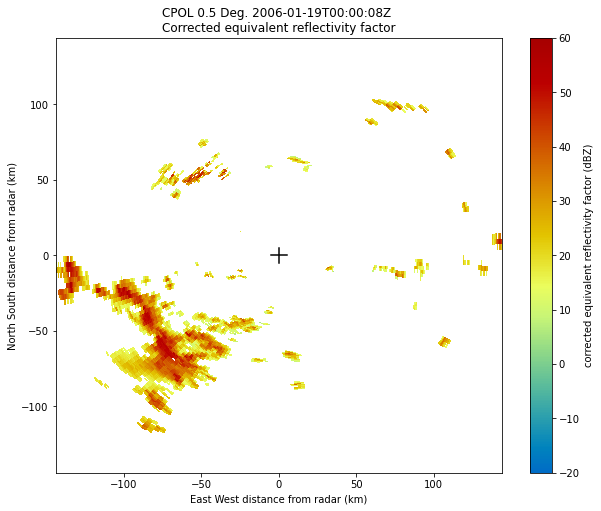

In [28]:
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
display.plot('corrected_reflectivity', 0, vmin=-20, vmax=60.)
display.plot_cross_hair(5.)
plt.show()
plt.close()

### Gridded Data
As mentioned before, `xarray` is an excellent package to use when working with gridded radar data

In [43]:
ds = xr.open_dataset(gridded_files[0])
ds

<xarray.Dataset>
Dimensions:                                (time: 1, x: 141, y: 141, z: 41, nradar: 1)
Coordinates:
  * time                                   (time) datetime64[ns] 2006-01-19T0...
  * x                                      (x) float64 -7e+04 -6.9e+04 ... 7e+04
  * y                                      (y) float64 -7e+04 -6.9e+04 ... 7e+04
  * z                                      (z) float64 0.0 500.0 ... 2e+04
Dimensions without coordinates: nradar
Data variables: (12/29)
    origin_latitude                        (time) float32 ...
    origin_longitude                       (time) float32 ...
    origin_altitude                        (time) int32 ...
    projection                             int32 ...
    ProjectionCoordinateSystem             int32 ...
    radar_latitude                         (nradar) float32 ...
    ...                                     ...
    corrected_specific_differential_phase  (time, z, y, x) float32 ...
    corrected_velocity                     (time, z, y, x) float32 ...
    differential_phase                     (time, z, y, x) float32 ...
    velocity                               (time, z, y, x) float32 ...
    spectrum_width                         (time, z, y, x) float32 ...
    reflectivity_gridded_dBZ               (time, z, y, x) float32 ...
Attributes: (12/35)
    Conventions:           CF/Radial instrument_parameters
    acknowledgement:       This work has been supported by the U.S. Departmen...
    country:               Australia
    creator_email:         valentin.louf@bom.gov.au
    creator_name:          Valentin Louf
    geospatial_bounds:     (129.703, 132.385, -13.552, -10.941)
    ...                    ...
    field_names:           corrected_differential_reflectivity, cross_correla...
    history:               created by Valentin Louf on raijin.nci.org.au at 2...
    volume_number:         0
    platform_type:         fixed
    instrument_type:       radar
    primary_axis:          axis_z

In [44]:
ds.reflectivity_gridded_Z

<xarray.DataArray 'reflectivity_gridded_Z' (time: 1, z: 41, y: 141, x: 141)>
[815121 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2006-01-19T00:00:08
  * x        (x) float64 -7e+04 -6.9e+04 -6.8e+04 ... 6.8e+04 6.9e+04 7e+04
  * y        (y) float64 -7e+04 -6.9e+04 -6.8e+04 ... 6.8e+04 6.9e+04 7e+04
  * z        (z) float64 0.0 500.0 1e+03 1.5e+03 ... 1.9e+04 1.95e+04 2e+04
Attributes:
    long_name:  Corrected reflectivity gridded linearly
    units:      dBZ
    comment:    Reflectivity field of reference.

Let's plot up the reflectivity at 3000 m using the same color scale!

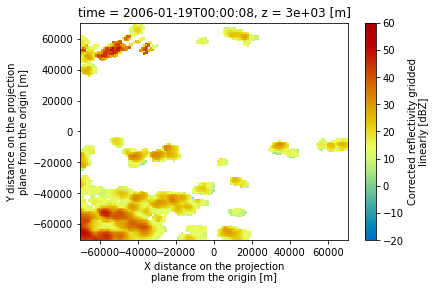

In [46]:
ds.reflectivity_gridded_Z.sel(z=3000).plot(cmap='pyart_HomeyerRainbow',
                                           vmin=-20,
                                           vmax=60)